In [1]:
# Import dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from citipy import citipy

# import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [2]:
# Create a random set of latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a coordinate list.
coordinates = list(lats_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

36.69558810911815 -93.22890764482099
13.355956705268326 39.39194790727353
-0.1532478091067162 -88.65422414697952
24.055907210335832 59.604013387232584
-5.553881007699587 54.77733235922008
89.45912237136267 -142.5232969924647
59.27355724719334 1.2144751464028332
29.590767925948313 147.10375721116316
46.50717316097888 -67.7543584710065
-52.441313410741344 -121.03086507942406
-24.521772418317553 -119.76547006558965
82.65010656034644 -123.57554756965499
-63.114908725727574 16.42281817318576
55.82705999837009 148.2748385908218
-89.75799445625273 52.49712887751494
-58.0324628341871 12.952320742935399
10.53748484575857 -97.62469019283563
-73.95007735854674 59.35806310947859
1.0373757309348974 -10.981208890779754
-3.211819778570799 48.604057668109164
81.60685118227607 133.72259620666512
18.06646406358277 -57.40902142140433
-2.7996507106139035 -68.60783521026069
-66.46309116140431 -150.52565909412039
46.88726442356045 104.78281915424327
4.533069685702316 -150.7467311379791
-88.60442558905743 -1

-87.37375855098097 167.84440396582778
-64.3514344898137 17.223985202114335
-54.156539542393595 -23.571913850651214
7.338875889616048 114.96692225078601
62.50206826699599 -171.15861497872845
73.59733382917949 -105.57275698266744
73.35090286678934 -68.02977067471974
-85.82996673650628 -159.32227607019792
24.565600901374523 -110.67904819350413
58.17959135978015 53.62909245659253
63.915742097732135 -164.7466653119526
39.7536218725341 -101.9661433634104
-8.781106484522809 -77.97666429747747
-58.975614176059736 140.18579067298418
10.973561187321181 80.6262171750372
27.355634224643254 179.50983480779996
78.57852445622757 -163.73448892263733
-34.47158305930806 -129.9373510740121
-65.96962737436925 -94.98887813038966
-34.09232240584392 -47.35667352833434
46.93609642192868 174.9579867887743
-89.4638775700042 125.02138350843938
-51.48236796253938 58.08412187032087
80.04315976227494 12.492475499426348
-19.65651160887694 126.24366328835316
30.128852990520087 -136.91572272050033
-19.660992285170195 

In [5]:
# Create a list fpr holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficent count
len(cities)

595

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57fa3b89900262ba2836b3dad5e6a4ef


In [8]:
# create an empty list to hold the weather data
city_data = []
# print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")
#create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for lat_lng, city in enumerate(cities):
    # group cities in sets of 50 and rest for 60 seconds for site restrictions
    if (lat_lng % 50 == 0 and lat_lng >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)    
    # create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record and set numbers and the city.
    print(f"Procesing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Procesing Record 1 of Set 1 | ozark
Procesing Record 2 of Set 1 | abiy adi
City not found. Skipping...
Procesing Record 3 of Set 1 | san cristobal
Procesing Record 4 of Set 1 | qurayyat
Procesing Record 5 of Set 1 | victoria
Procesing Record 6 of Set 1 | tuktoyaktuk
Procesing Record 7 of Set 1 | lerwick
Procesing Record 8 of Set 1 | katsuura
Procesing Record 9 of Set 1 | presque isle
Procesing Record 10 of Set 1 | rikitea
Procesing Record 11 of Set 1 | bredasdorp
Procesing Record 12 of Set 1 | arman
Procesing Record 13 of Set 1 | port alfred
Procesing Record 14 of Set 1 | hermanus
Procesing Record 15 of Set 1 | pochutla
Procesing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Procesing Record 17 of Set 1 | harper
Procesing Record 18 of Set 1 | mogadishu
Procesing Record 19 of Set 1 | nizhneyansk
City not found. Skipping...
Procesing Record 20 of Set 1 | saint-francois
Procesing Record 21 of Set 1 | sao paulo de olivenca
Procesing Record 22 of Set 1 | mataura
Procesing Recor

Procesing Record 41 of Set 4 | srednekolymsk
Procesing Record 42 of Set 4 | bobovdol
Procesing Record 43 of Set 4 | banganapalle
Procesing Record 44 of Set 4 | roebourne
Procesing Record 45 of Set 4 | orgovany
Procesing Record 46 of Set 4 | svetlogorsk
Procesing Record 47 of Set 4 | beya
Procesing Record 48 of Set 4 | grindavik
Procesing Record 49 of Set 4 | pevek
Procesing Record 50 of Set 4 | houma
Procesing Record 1 of Set 5 | brae
Procesing Record 2 of Set 5 | yelniki
Procesing Record 3 of Set 5 | sergeyevka
Procesing Record 4 of Set 5 | antalaha
Procesing Record 5 of Set 5 | gazojak
Procesing Record 6 of Set 5 | vung tau
Procesing Record 7 of Set 5 | hasaki
Procesing Record 8 of Set 5 | ancud
Procesing Record 9 of Set 5 | orlik
Procesing Record 10 of Set 5 | savannah bight
Procesing Record 11 of Set 5 | port elizabeth
Procesing Record 12 of Set 5 | umm kaddadah
Procesing Record 13 of Set 5 | djibo
Procesing Record 14 of Set 5 | nikolskoye
Procesing Record 15 of Set 5 | itacoatiara

Procesing Record 37 of Set 8 | straumen
Procesing Record 38 of Set 8 | hilsa
Procesing Record 39 of Set 8 | caravelas
Procesing Record 40 of Set 8 | cherskiy
Procesing Record 41 of Set 8 | galle
Procesing Record 42 of Set 8 | zheleznodorozhnyy
Procesing Record 43 of Set 8 | samarai
Procesing Record 44 of Set 8 | homer
Procesing Record 45 of Set 8 | sinazongwe
Procesing Record 46 of Set 8 | sao felix do xingu
Procesing Record 47 of Set 8 | datong
Procesing Record 48 of Set 8 | yatou
Procesing Record 49 of Set 8 | linguere
Procesing Record 50 of Set 8 | xingyi
Procesing Record 1 of Set 9 | manokwari
Procesing Record 2 of Set 9 | lakes entrance
Procesing Record 3 of Set 9 | berlevag
Procesing Record 4 of Set 9 | mahibadhoo
Procesing Record 5 of Set 9 | weihe
Procesing Record 6 of Set 9 | isangel
Procesing Record 7 of Set 9 | bagua grande
Procesing Record 8 of Set 9 | tidore
City not found. Skipping...
Procesing Record 9 of Set 9 | aklavik
Procesing Record 10 of Set 9 | tura
Procesing Reco

Procesing Record 30 of Set 12 | boueni
Procesing Record 31 of Set 12 | clearwater
Procesing Record 32 of Set 12 | changji
Procesing Record 33 of Set 12 | conceicao do araguaia
Procesing Record 34 of Set 12 | gorontalo
Procesing Record 35 of Set 12 | bantogon
Procesing Record 36 of Set 12 | trairi
Procesing Record 37 of Set 12 | lahij
Procesing Record 38 of Set 12 | uzyn
Procesing Record 39 of Set 12 | buchanan
Procesing Record 40 of Set 12 | bilma
Procesing Record 41 of Set 12 | alice springs
Procesing Record 42 of Set 12 | bac lieu
Procesing Record 43 of Set 12 | gobabis
Procesing Record 44 of Set 12 | cristalina
Procesing Record 45 of Set 12 | manzanillo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ozark,37.0209,-93.2060,76.80,31,53,7.20,US,2022-10-01 23:06:21
1,San Cristobal,7.7669,-72.2250,73.58,93,38,3.09,VE,2022-10-01 23:06:22
2,Qurayyat,31.3318,37.3428,77.90,28,0,7.05,SA,2022-10-01 23:06:22
3,Victoria,22.2855,114.1577,84.38,82,14,10.00,HK,2022-10-01 23:03:11
4,Tuktoyaktuk,69.4541,-133.0374,31.91,83,100,15.79,CA,2022-10-01 23:03:23
5,Lerwick,60.1545,-1.1494,53.60,88,33,20.07,GB,2022-10-01 23:06:23
6,Katsuura,35.1333,140.3000,72.95,74,67,10.40,JP,2022-10-01 23:06:23
7,Presque Isle,46.6811,-68.0159,53.29,74,100,6.91,US,2022-10-01 23:05:08
8,Rikitea,-23.1203,-134.9692,73.54,72,30,13.87,PF,2022-10-01 23:04:37
9,Bredasdorp,-34.5322,20.0403,51.69,90,69,4.12,ZA,2022-10-01 23:06:24


In [11]:
#reorder columns in data frame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ozark,US,2022-10-01 23:06:21,37.0209,-93.2060,76.80,31,53,7.20
1,San Cristobal,VE,2022-10-01 23:06:22,7.7669,-72.2250,73.58,93,38,3.09
2,Qurayyat,SA,2022-10-01 23:06:22,31.3318,37.3428,77.90,28,0,7.05
3,Victoria,HK,2022-10-01 23:03:11,22.2855,114.1577,84.38,82,14,10.00
4,Tuktoyaktuk,CA,2022-10-01 23:03:23,69.4541,-133.0374,31.91,83,100,15.79
5,Lerwick,GB,2022-10-01 23:06:23,60.1545,-1.1494,53.60,88,33,20.07
6,Katsuura,JP,2022-10-01 23:06:23,35.1333,140.3000,72.95,74,67,10.40
7,Presque Isle,US,2022-10-01 23:05:08,46.6811,-68.0159,53.29,74,100,6.91
8,Rikitea,PF,2022-10-01 23:04:37,-23.1203,-134.9692,73.54,72,30,13.87
9,Bredasdorp,ZA,2022-10-01 23:06:24,-34.5322,20.0403,51.69,90,69,4.12


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

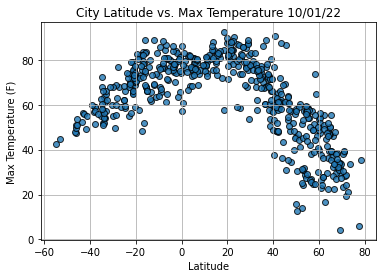

In [14]:
# Import time module
import time

#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

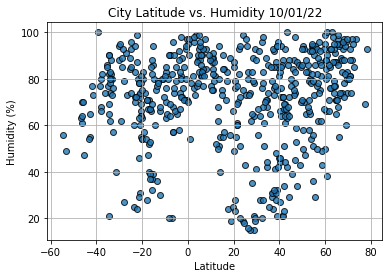

In [15]:
#Build the scatter plot for latitude vs. Humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

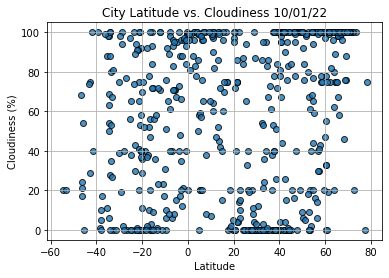

In [16]:
#Build the scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

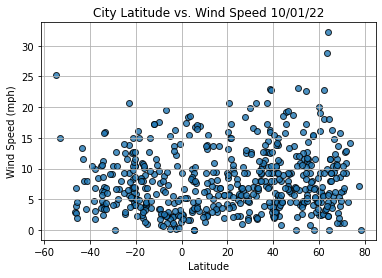

In [17]:
#Build the scatter plot for latitude vs. Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

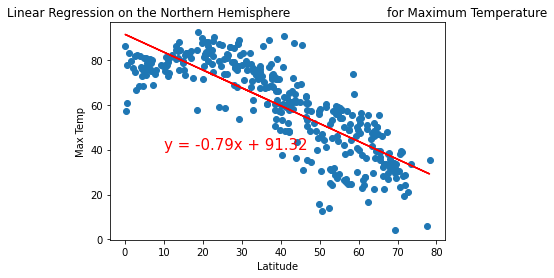

In [21]:
from scipy.stats import linregress
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

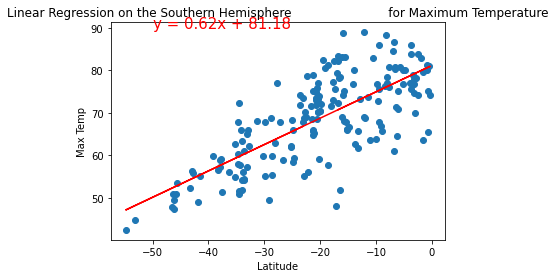

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

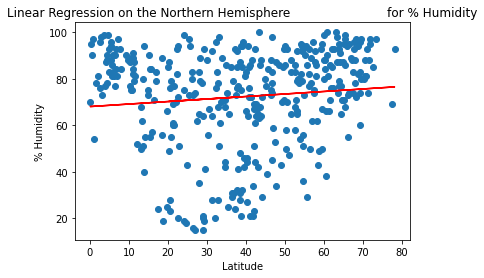

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

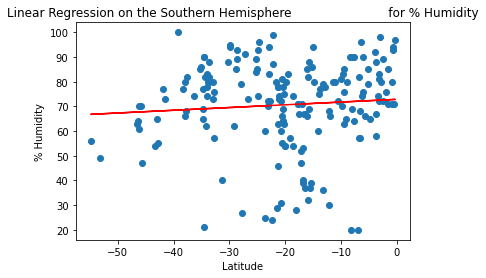

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

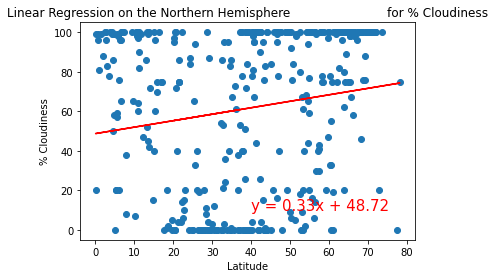

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

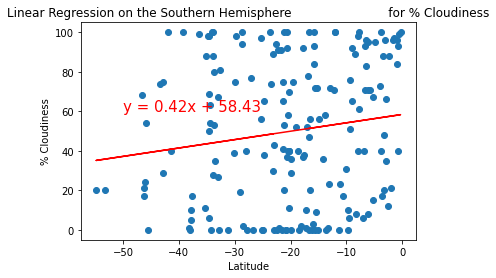

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

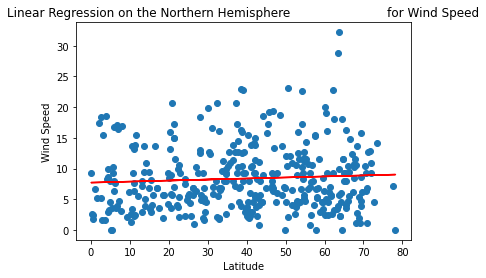

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

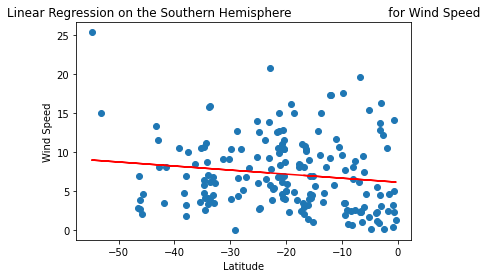

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))